In [25]:
import pandas as pd
import math

In [259]:
df_exp = pd.read_csv("Dataset/OpenPart.csv")
df_exp.head()
df_exp.set_index("Case",inplace=True)

In [257]:
df_exp.loc[df_exp.Case.str.contains("00000150_002")].iloc[0]["Case"]

'00000150_002.png'

In [266]:
df_exp.loc["00000150_002"+".png"]["Sample_1".replace("_"," ")]

5

In [268]:
"00000150_0d02"+".png" in df_exp.index

False

In [258]:
df_exp[df_exp.Case =="00000150_002"+".png"]

,Case,Sample 1,Sample 2,Sample 3
1,00000150_002.png,5,5,3


In [14]:
df_raw = pd.read_csv("Dataset/DX_TEST_RESULT_FULL.csv")
df_raw.rename({v:v[1:]  for v in df_raw.columns if v[0]==" "}, axis=1, inplace=True)


In [15]:
df_raw.head()

,file_name,user_name,xcenter,ycenter,rhorizontal,rvertical,shape,Unnamed: 7
0,00000150_002,sample_2,737.882353,690.389140,64.482655,28.573152,rectangle,NaN
1,00000181_061,sample_2,317.007541,749.466063,133.984917,198.081448,rectangle,NaN
2,00000181_061,sample_2,731.318250,926.696833,152.132730,69.502262,rectangle,NaN
3,00000181_061,sample_2,714.714932,628.609351,129.351433,216.229261,rectangle,NaN
4,00000211_019,sample_2,360.639517,589.224736,105.025641,219.318250,rectangle,NaN


In [4]:
df_raw.file_name.value_counts()

In [24]:
df_raw[df_raw["shape"]=="circle"]

,file_name,user_name,xcenter,ycenter,rhorizontal,rvertical,shape,Unnamed: 7
32,00000150_002,Expert,771.431635,700.739946,30.198391,28.139410,circle,NaN
34,00000181_061,Expert,743.292225,601.908847,74.809651,111.871314,circle,NaN
36,00000211_019,Expert,323.946381,605.340483,35.689008,146.873995,circle,NaN
37,00000211_019,Expert,752.900804,487.978552,50.101877,50.101877,circle,NaN
38,00000211_041,Expert,209.329759,551.806971,62.455764,152.364611,circle,NaN
...,...,...,...,...,...,...,...,...
894,00020124_003,Expert,761.823056,458.466488,30.198391,24.707775,circle,NaN
895,00020124_003,Expert,695.249330,409.050938,29.512064,28.825737,circle,NaN
896,00020124_003,Expert,819.474531,481.115282,27.453083,26.766756,circle,NaN
897,00020124_003,Expert,334.241287,609.458445,85.790885,64.514745,circle,NaN


In [361]:
from shapely.geometry import Polygon
p1 = Polygon([(0,0), (10,0),(10,10),(0,10)])#,(10,0), (11,0),(11,1),(10,1) ])
p2 = Polygon([(5,-5), (5,15), (8,15),(8,-5)])

print(p1.difference(p2),p1.difference(p2).area)

In [368]:
print(p3.difference(p2))

MULTIPOLYGON (((5 0, 0 0, 0 10, 5 10, 5 0)), ((8 10, 10 10, 10 0, 8 0, 8 10)))


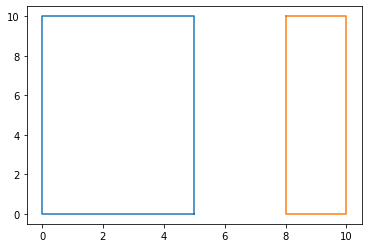

In [362]:
import matplotlib.pyplot as plt
p3 = p1.difference(p2)
for p in p3:
    plt.plot(*p.exterior.xy)
plt.show()

In [23]:
df_raw.user_name.unique(), df_raw["shape"].unique()

(array(['sample_2', 'Expert', 'sample_1', 'sample_3'], dtype=object),
 array(['rectangle', 'circle'], dtype=object))

In [224]:
def get_intersection_area(point,point):
    
    
    
def get_intersection_area(point,points):
    
def get_dist_to_point(point1,point2,verbose=True, metric="euclead"):
    if verbose:
        print("get dist",point2)
    if metric=="euclead":
        return math.sqrt(
            (point1.xcenter - point2.xcenter)**2+(point1.ycenter - point2.ycenter)**2
        )
    if metric=="manhattan":
        return  abs(point1.xcenter - point2.xcenter),abs(point1.ycenter - point2.ycenter)
    return None
    

def get_closest_point(raw_point, raw_points, verbose=True,options={"metric":"euclead"}):
    if verbose:
        print("get closest",raw_points)
    dists = raw_points.reset_index().apply(lambda x:
                                           get_dist_to_point(
                                               raw_point,x,verbose=verbose,metric=options["metric"]),
                                           axis=1)
    if verbose:
        print(raw_point.xcenter, raw_point.ycenter,"dist", dists.min(),raw_points.shape)
    return raw_points.reset_index().iloc[dists.idxmin()]

def is_point_good(point1, point2, verbose=True):
    x_shapes = point1.rhorizontal + point2.rhorizontal
    y_shapes = point1.rvertical + point2.rvertical
    x_dist,y_dist=get_dist_to_point(point1,point2,verbose=verbose, metric="manhattan")
    if x_dist>0.9*x_shapes or y_dist>0.9*y_shapes:
        return False
    return True
def is_closes_point_good(raw_point, raw_points, verbose=True,options={"metric":"euclead"}):
    closest=get_closest_point(raw_point, raw_points, verbose=verbose,options=options)
    if verbose:
        print("is closes good",raw_point,closest)
    return is_point_good(raw_point, closest, verbose=verbose)

def get_bad_num(points1,points2,verbose=False,options={}):
  #  print(points1.shape)
    badlist = [not is_closes_point_good(p1[1],points2,verbose=verbose) for p1 in points1.iterrows()]
    if verbose:
        print(badlist)
    return int(sum(badlist))

In [225]:
file_names = df_raw.file_name.unique()
file_name = file_names[0]
ind=1

In [271]:
%%time
df_train =pd.DataFrame()

for file_name in  df_raw.file_name.unique():
    df_file = df_raw[df_raw["file_name"] == file_name] 
   # print(file_name)
    for ind in [1,2,3]:
        sample="sample_"+str(ind)
        
        target = df_exp.loc[file_name+".png"]["Sample "+str(ind)
                                             ] if file_name+".png" in df_exp.index else None
     #   print(sample)
        if df_file[df_file["user_name"]==sample].shape[0]==0:
            df_train=df_train.append(pd.Series({"file_name":file_name,"sample":sample,
                                            "badcount_Expert":
                                                df_file[df_file["user_name"]=="Expert"].shape[0],
                                             "badcount_neuro":0,
                                               "target":target}),
                                  ignore_index=True)
            continue
        if  df_file[df_file["user_name"]=="Expert"].shape[0]==0:
            df_train=df_train.append(pd.Series({"file_name":file_name,"sample":sample,
                                            "badcount_Expert":
                                              0,
                                             "badcount_neuro":df_file[df_file["user_name"]==sample].shape[0],
                                               "target":target}),
                                  ignore_index=True)
            continue
            
        badcount_exp=get_bad_num(df_file[df_file["user_name"]=="Expert"],df_file[df_file["user_name"]==sample],
                   verbose=False)

        badcount_neuro=get_bad_num(df_file[df_file["user_name"]==sample],df_file[df_file["user_name"]=="Expert"],
                   verbose=False)
        df_train=df_train.append(pd.Series({"file_name":file_name,"sample":sample,
                                            "badcount_Expert":int(badcount_exp),
                                             "badcount_neuro":int(badcount_neuro),
                                           "target":target}),
                                  ignore_index=True)
print(df_train)

     badcount_Expert  badcount_neuro     file_name    sample  target
0                0.0             0.0  00000150_002  sample_1     5.0
1                0.0             0.0  00000150_002  sample_2     5.0
2                0.0             0.0  00000150_002  sample_3     3.0
3                0.0             1.0  00000181_061  sample_1     4.0
4                0.0             1.0  00000181_061  sample_2     4.0
..               ...             ...           ...       ...     ...
295              0.0             0.0  00018980_002  sample_2     NaN
296              1.0             1.0  00018980_002  sample_3     NaN
297              0.0             0.0  00016267_000  sample_1     NaN
298              0.0             0.0  00016267_000  sample_2     NaN
299              0.0             1.0  00016267_000  sample_3     NaN

[300 rows x 5 columns]
CPU times: user 4.57 s, sys: 0 ns, total: 4.57 s
Wall time: 4.57 s


In [311]:
df_train.to_csv("df_train.csv")

In [281]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import lightgbm

In [308]:
X_train, X_test, y_train, y_test =  train_test_split(df_train[~df_train.target.isna()],
                                                    df_train[~df_train.target.isna()]["target"],
                                                   )
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((135, 5), (135,), (45, 5), (45,))

In [382]:
from sklearn.model_selection import KFold
def cross_val(ld,df=df_train):
    df = df[~df.target.isna()]
    file_names =  df.file_name.unique();
    kf = KFold(n_splits=4,random_state=42)
    res_list=list()
    lr_list=list()
    for train_index, test_index in kf.split(file_names):
        files_train, files_test = file_names[train_index], file_names[test_index]
        X_train = df[df.file_name.isin(files_train)]
        X_test = df[df.file_name.isin(files_test)]
        y_train=X_train.target
        y_test=X_test.target
        lr,res=fit_and_check(ld,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
        res_list.append(res)
        lr_list.append(lr)
    print([l[0] for l in res_list])
    print([l[1] for l in res_list])
    
    return res_list,lr_list


def fit_and_check(lr,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,
                 train_cols = ["badcount_Expert", "badcount_neuro"]
            ):
    lr.fit(X_train[train_cols],y_train)
    y_pred = lr.predict(X_test[train_cols])
    y_train_pr = lr.predict(X_train[train_cols])
   # print("test mae",mean_absolute_error(y_test,y_pred),"r2",r2_score(y_test,y_pred))
   # print("train mae",mean_absolute_error(y_train,y_train_pr),"r2",r2_score(y_train,y_train_pr))
    return(lr,(("test mae",mean_absolute_error(y_test,y_pred),"r2",r2_score(y_test,y_pred)),
    ("train mae",mean_absolute_error(y_train,y_train_pr),"r2",r2_score(y_train,y_train_pr))))
res = cross_val(DecisionTreeRegressor(max_depth=5))
print(sum([v[1] for v in res[0][0]])/len(res))

[('test mae', 0.8128062678062677, 'r2', 0.28511110718665256), ('test mae', 0.7346276648000785, 'r2', 0.48774251483919673), ('test mae', 0.9055521783181357, 'r2', 0.34429514217646595), ('test mae', 0.9061917359536408, 'r2', 0.45952261326396815)]
[('train mae', 0.705622032288699, 'r2', 0.562515814777328), ('train mae', 0.7446442021154664, 'r2', 0.517843519099445), ('train mae', 0.6966771736275282, 'r2', 0.5509466931546685), ('train mae', 0.7406567565297725, 'r2', 0.4997061791552593)]
0.7592141500474834


In [404]:
res = cross_val(lightgbm.LGBMRegressor(max_depth=100,n_estimators=1000))
print(sum([v[0][1] for v in res[0]])/len(res[0])), print(sum([v[1][1] for v in res[0]])/len(res[0]))

[('test mae', 0.7929679771312759, 'r2', 0.3209721004803586), ('test mae', 0.793464643375618, 'r2', 0.4512319956071662), ('test mae', 0.9760283546072942, 'r2', 0.32885179540936216), ('test mae', 0.9608578195522415, 'r2', 0.43537754821282504)]
[('train mae', 0.7820982877250612, 'r2', 0.5032202924004355), ('train mae', 0.8699063788415587, 'r2', 0.4455736555085773), ('train mae', 0.8081165629332717, 'r2', 0.49679981461129163), ('train mae', 0.81811987798341, 'r2', 0.4448987572321521)]
0.8808296986666073
0.8195602768708254


(None, None)

In [402]:
res = cross_val(sklearn.linear_model.LinearRegression())
print(sum([v[0][1] for v in res[0]])/len(res[0])), print(sum([v[1][1] for v in res[0]])/len(res[0]))

[('test mae', 0.9021661565867627, 'r2', 0.16550597965939307), ('test mae', 0.8924799049551112, 'r2', 0.34370634044655024), ('test mae', 1.200199780175084, 'r2', -0.014195629426553058), ('test mae', 1.0170294599705219, 'r2', 0.33739192979021804)]
[('train mae', 0.9878875442112404, 'r2', 0.32765625604115), ('train mae', 1.006405408117552, 'r2', 0.2679682597501568), ('train mae', 0.8644178469363032, 'r2', 0.37959445136636394), ('train mae', 0.9510779202006606, 'r2', 0.2692244509773358)]
1.00296882542187
0.9524471798664391


(None, None)

In [401]:
res = cross_val(sklearn.svm.SVC())
print(sum([v[0][1] for v in res[0]])/len(res[0])), print(sum([v[1][1] for v in res[0]])/len(res[0]))

[('test mae', 0.6888888888888889, 'r2', 0.2837078651685392), ('test mae', 0.6666666666666666, 'r2', 0.24284913067863145), ('test mae', 0.7777777777777778, 'r2', 0.30257510729613746), ('test mae', 0.8888888888888888, 'r2', 0.27765726681127967)]
[('train mae', 0.6666666666666666, 'r2', 0.3656015037593987), ('train mae', 0.7185185185185186, 'r2', 0.32622842331660495), ('train mae', 0.674074074074074, 'r2', 0.33138053998981165), ('train mae', 0.6814814814814815, 'r2', 0.29011054675829095)]
0.7555555555555555
0.6851851851851852


/home/rumata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rumata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rumata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rumata/anaconda3/lib/python3.7/site-packages/skle

(None, None)

In [395]:
res[0][0]

(('test mae', 0.7929679771312759, 'r2', 0.3209721004803586),
 ('train mae', 0.7820982877250612, 'r2', 0.5032202924004355))